In [2]:
from sklearn.datasets import load_iris, load_wine, load_breast_cancer
from sklearn import tree
from sklearn.model_selection import cross_val_score
import matplotlib.pylab as plt
import numpy as np 

In [2]:
iris = load_iris()
X, y = iris.data, iris.target
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)

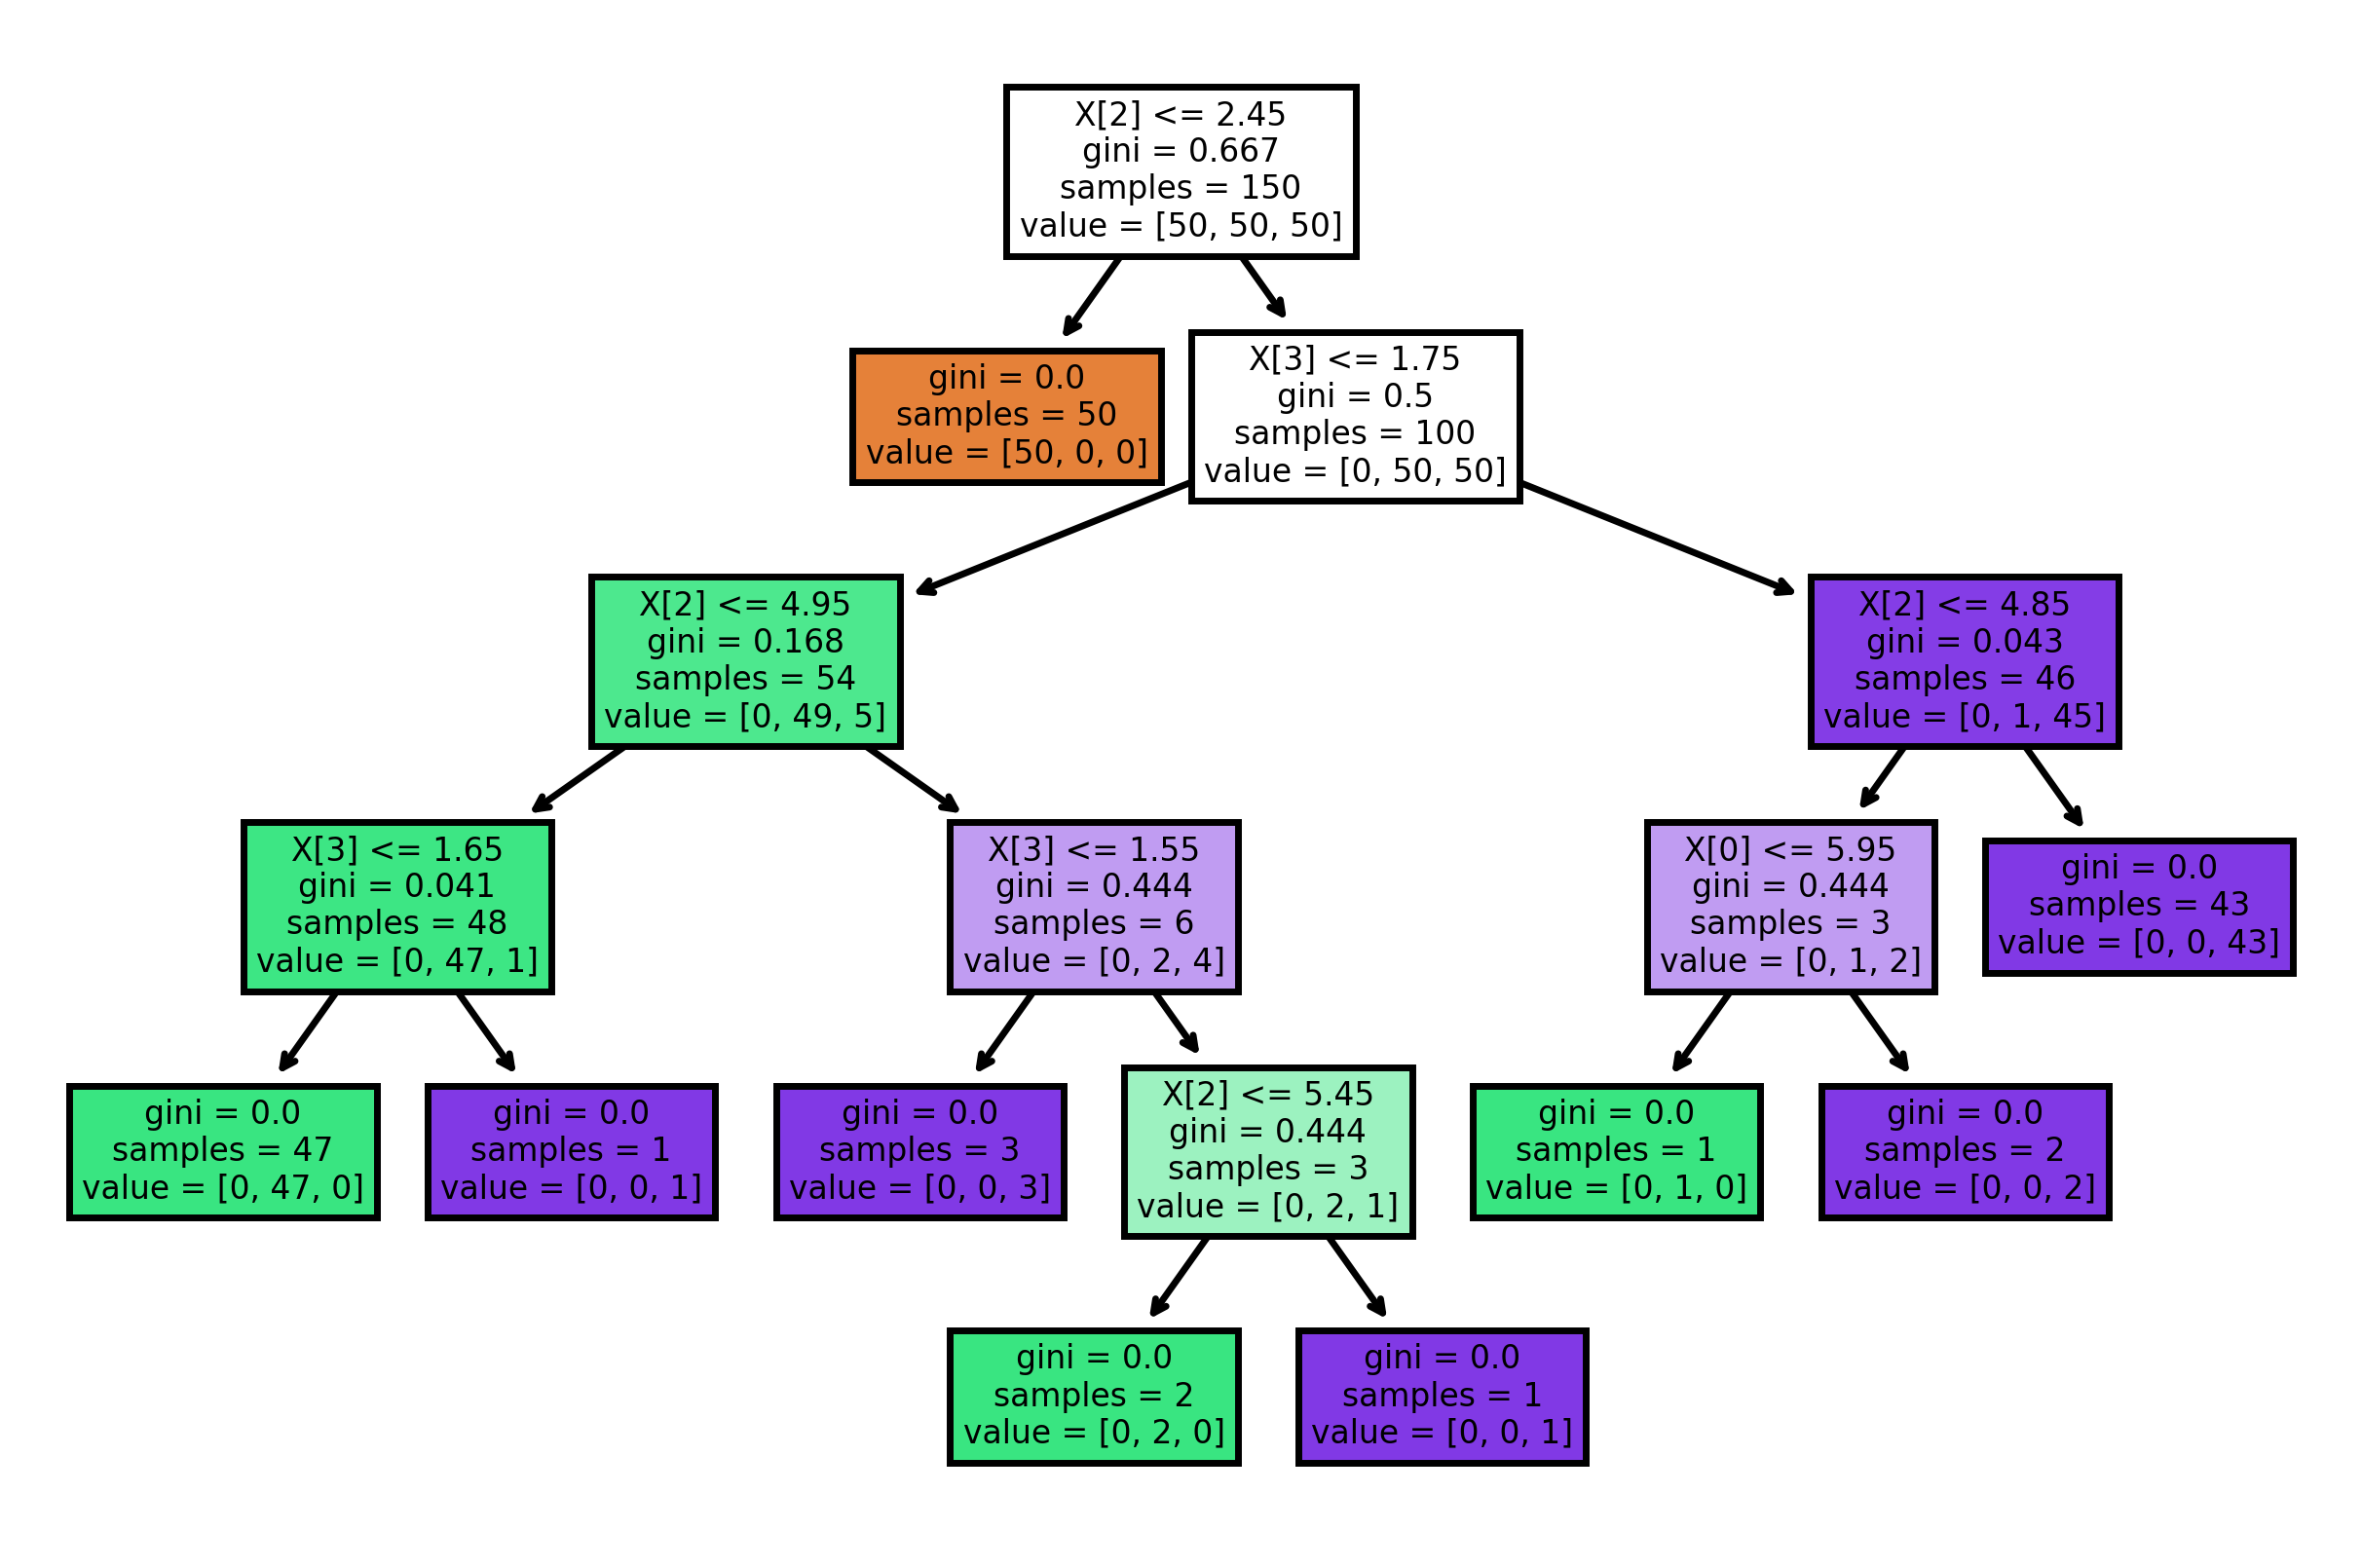

In [3]:
plt.figure(dpi=500)
ax = plt.gca()
tree.plot_tree(clf, ax=ax, filled=True)
plt.savefig('pdf/tree_iris.pdf')

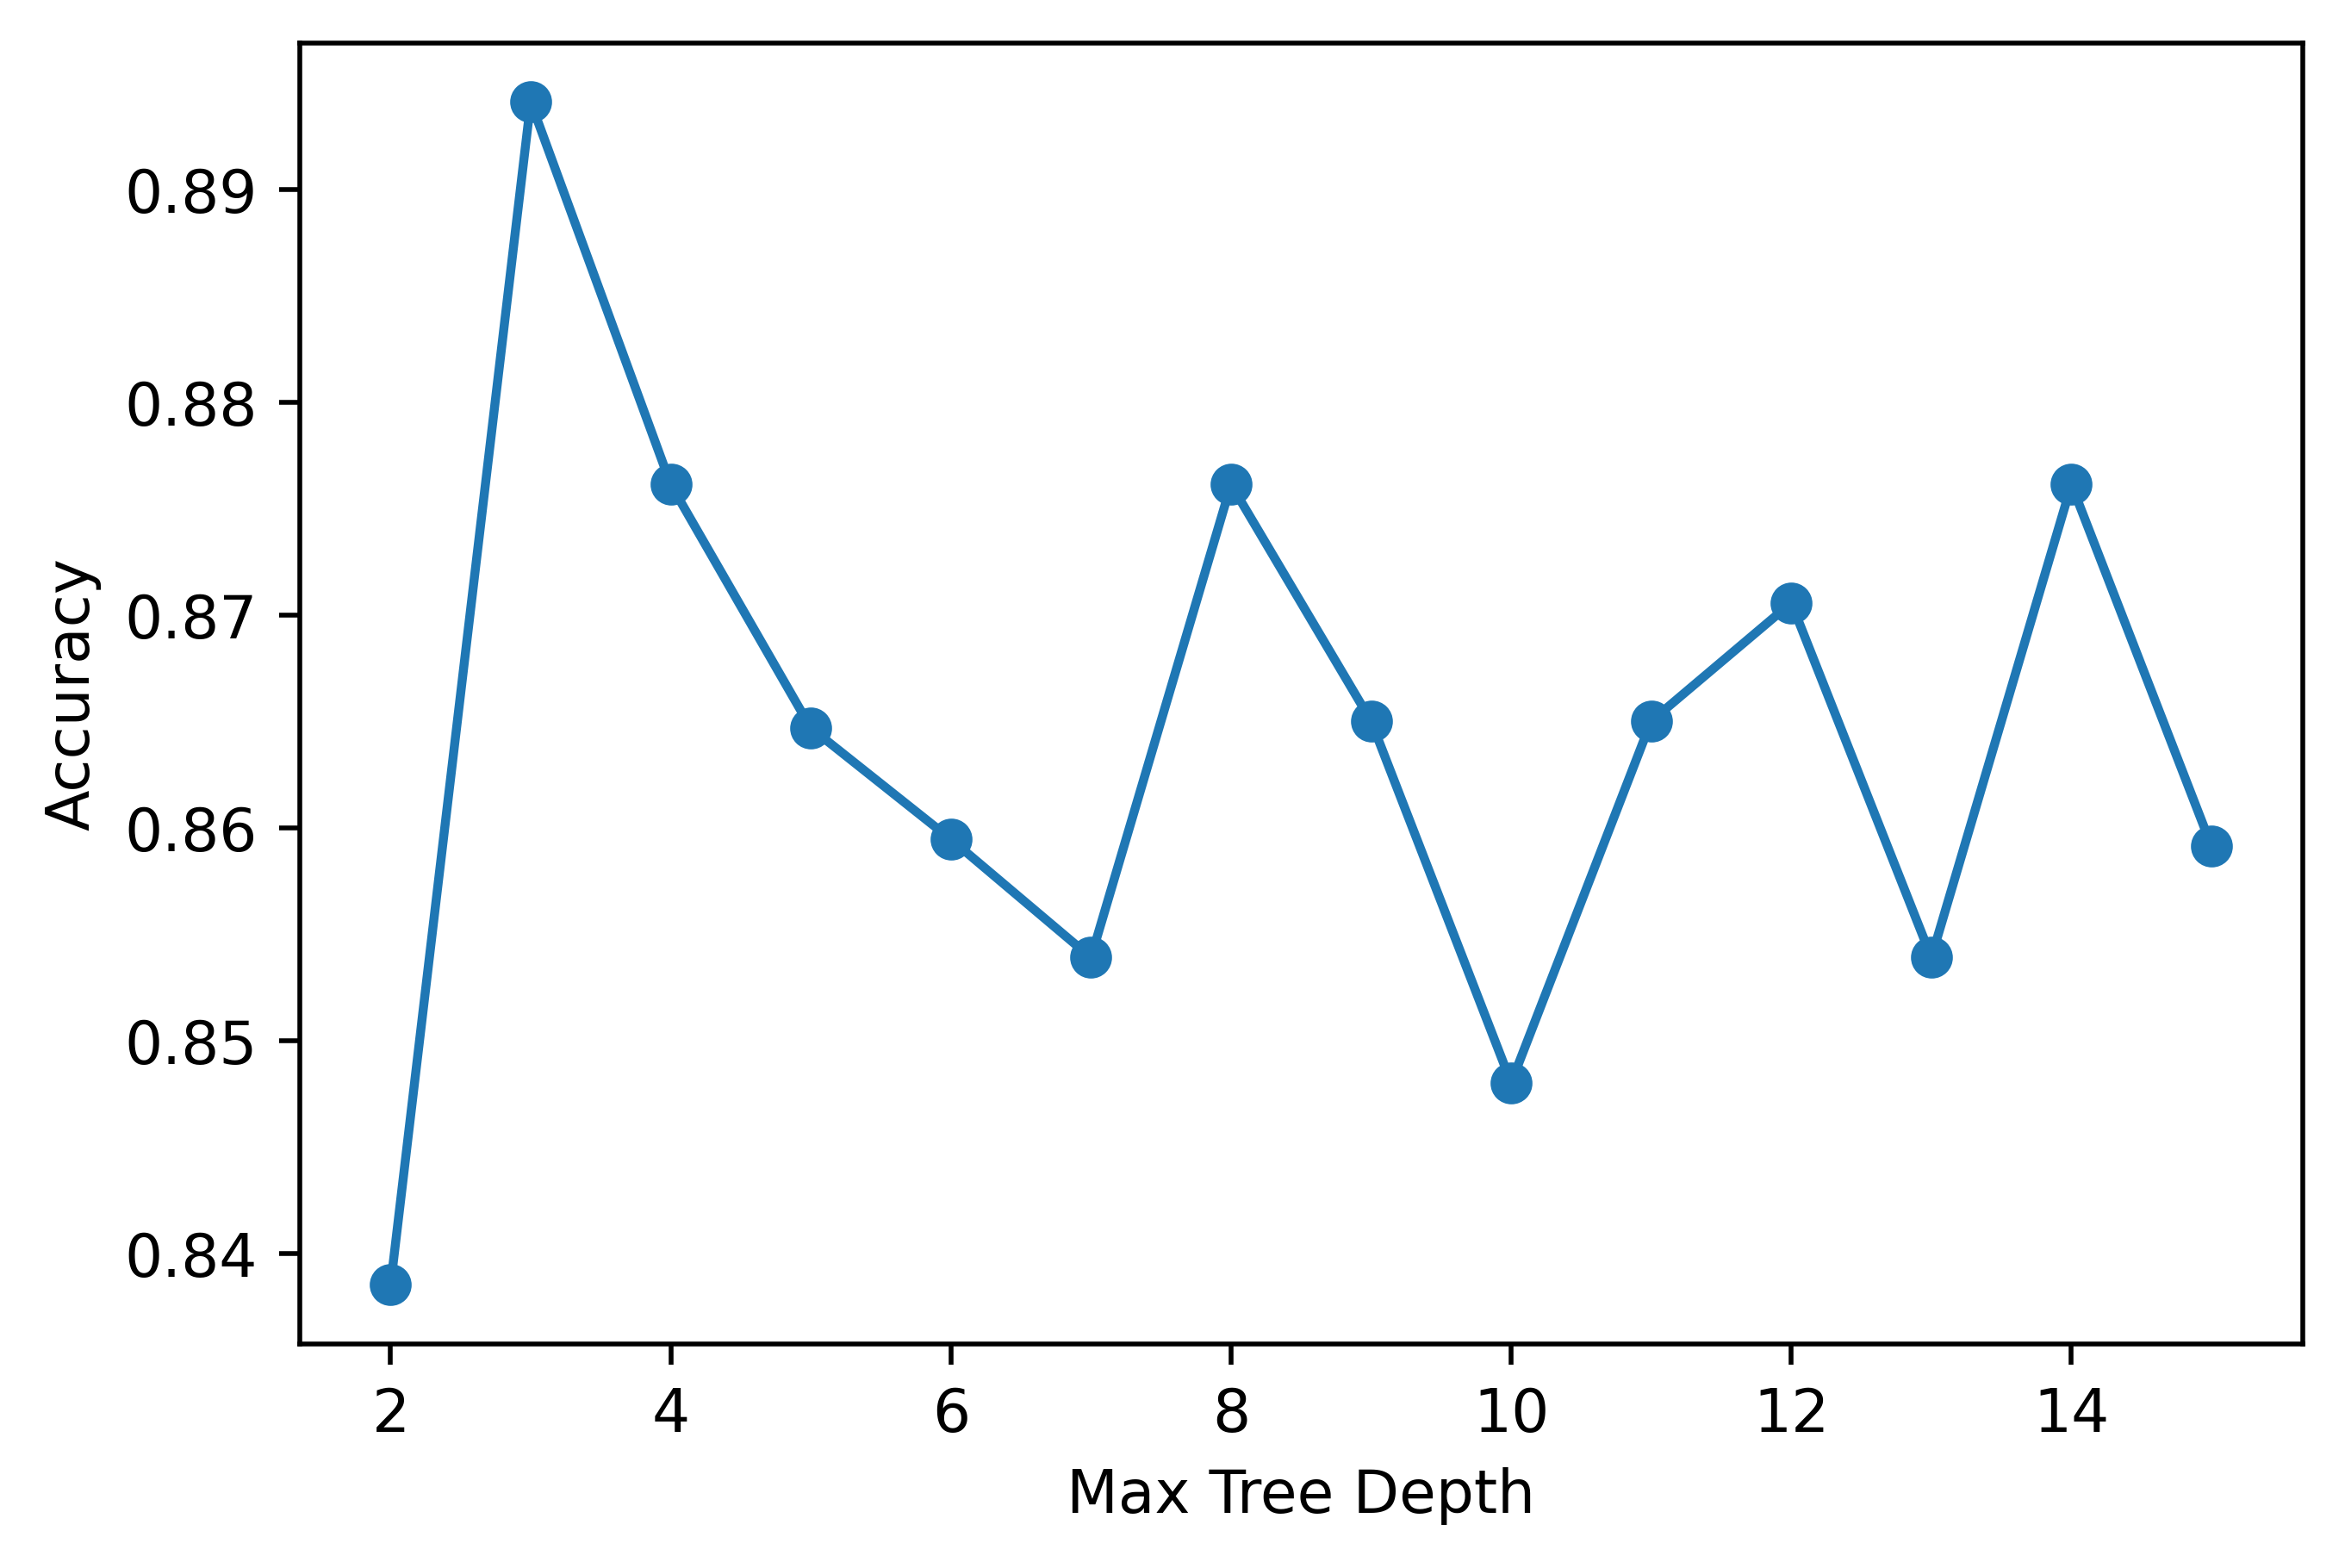

In [31]:
wine = load_wine()
X, y = wine.data, wine.target

depths = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
scores = np.zeros(len(depths))

for i, d in enumerate(depths): 
    scores[i] = cross_val_score(tree.DecisionTreeClassifier(max_depth=d), X, y, cv=10).mean()
    
plt.figure(dpi=500)
plt.plot(depths, scores, marker='o')
plt.xlabel('Max Tree Depth')
plt.ylabel('Accuracy')
plt.savefig('pdf/tree_wine_perf.pdf')


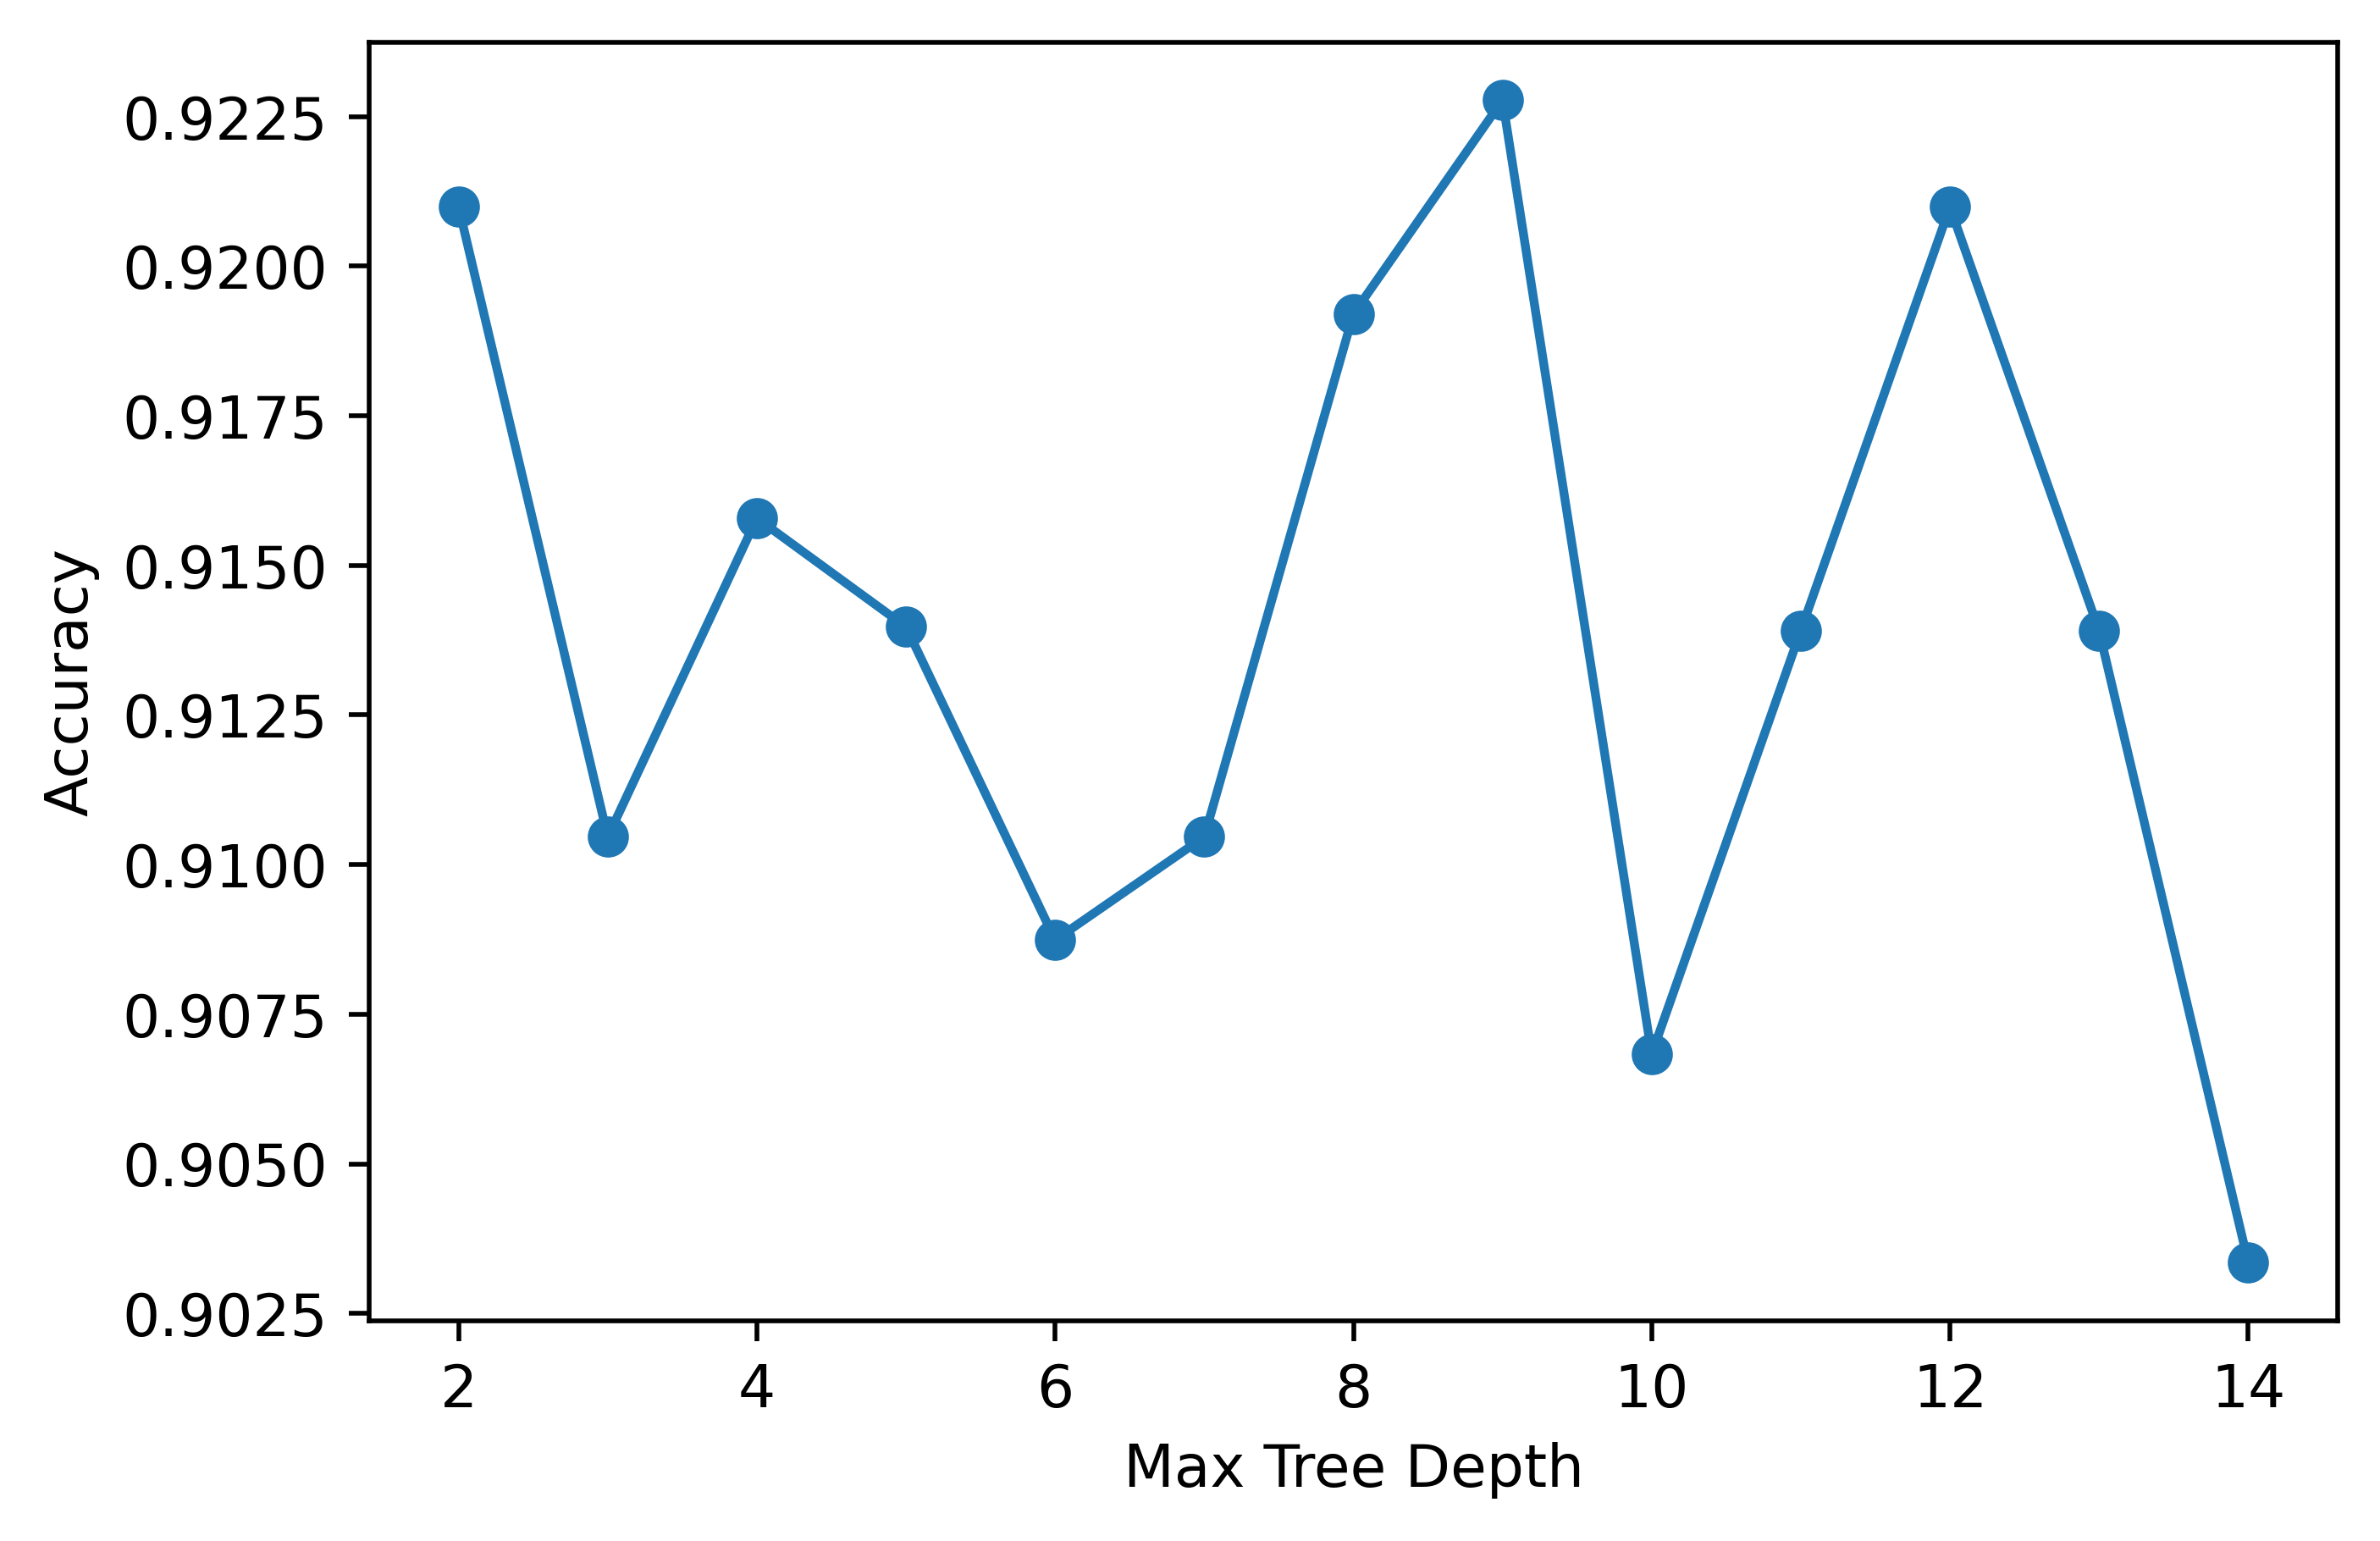

In [36]:
cancer = load_breast_cancer()
X, y = cancer.data, cancer.target

depths = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
scores = np.zeros(len(depths))

for i, d in enumerate(depths): 
    scores[i] = cross_val_score(tree.DecisionTreeClassifier(max_depth=d), X, y, cv=10).mean()
    
plt.figure(dpi=500)
plt.plot(depths, scores, marker='o')
plt.xlabel('Max Tree Depth')
plt.ylabel('Accuracy')
plt.savefig('pdf/tree_cancer_perf.pdf')


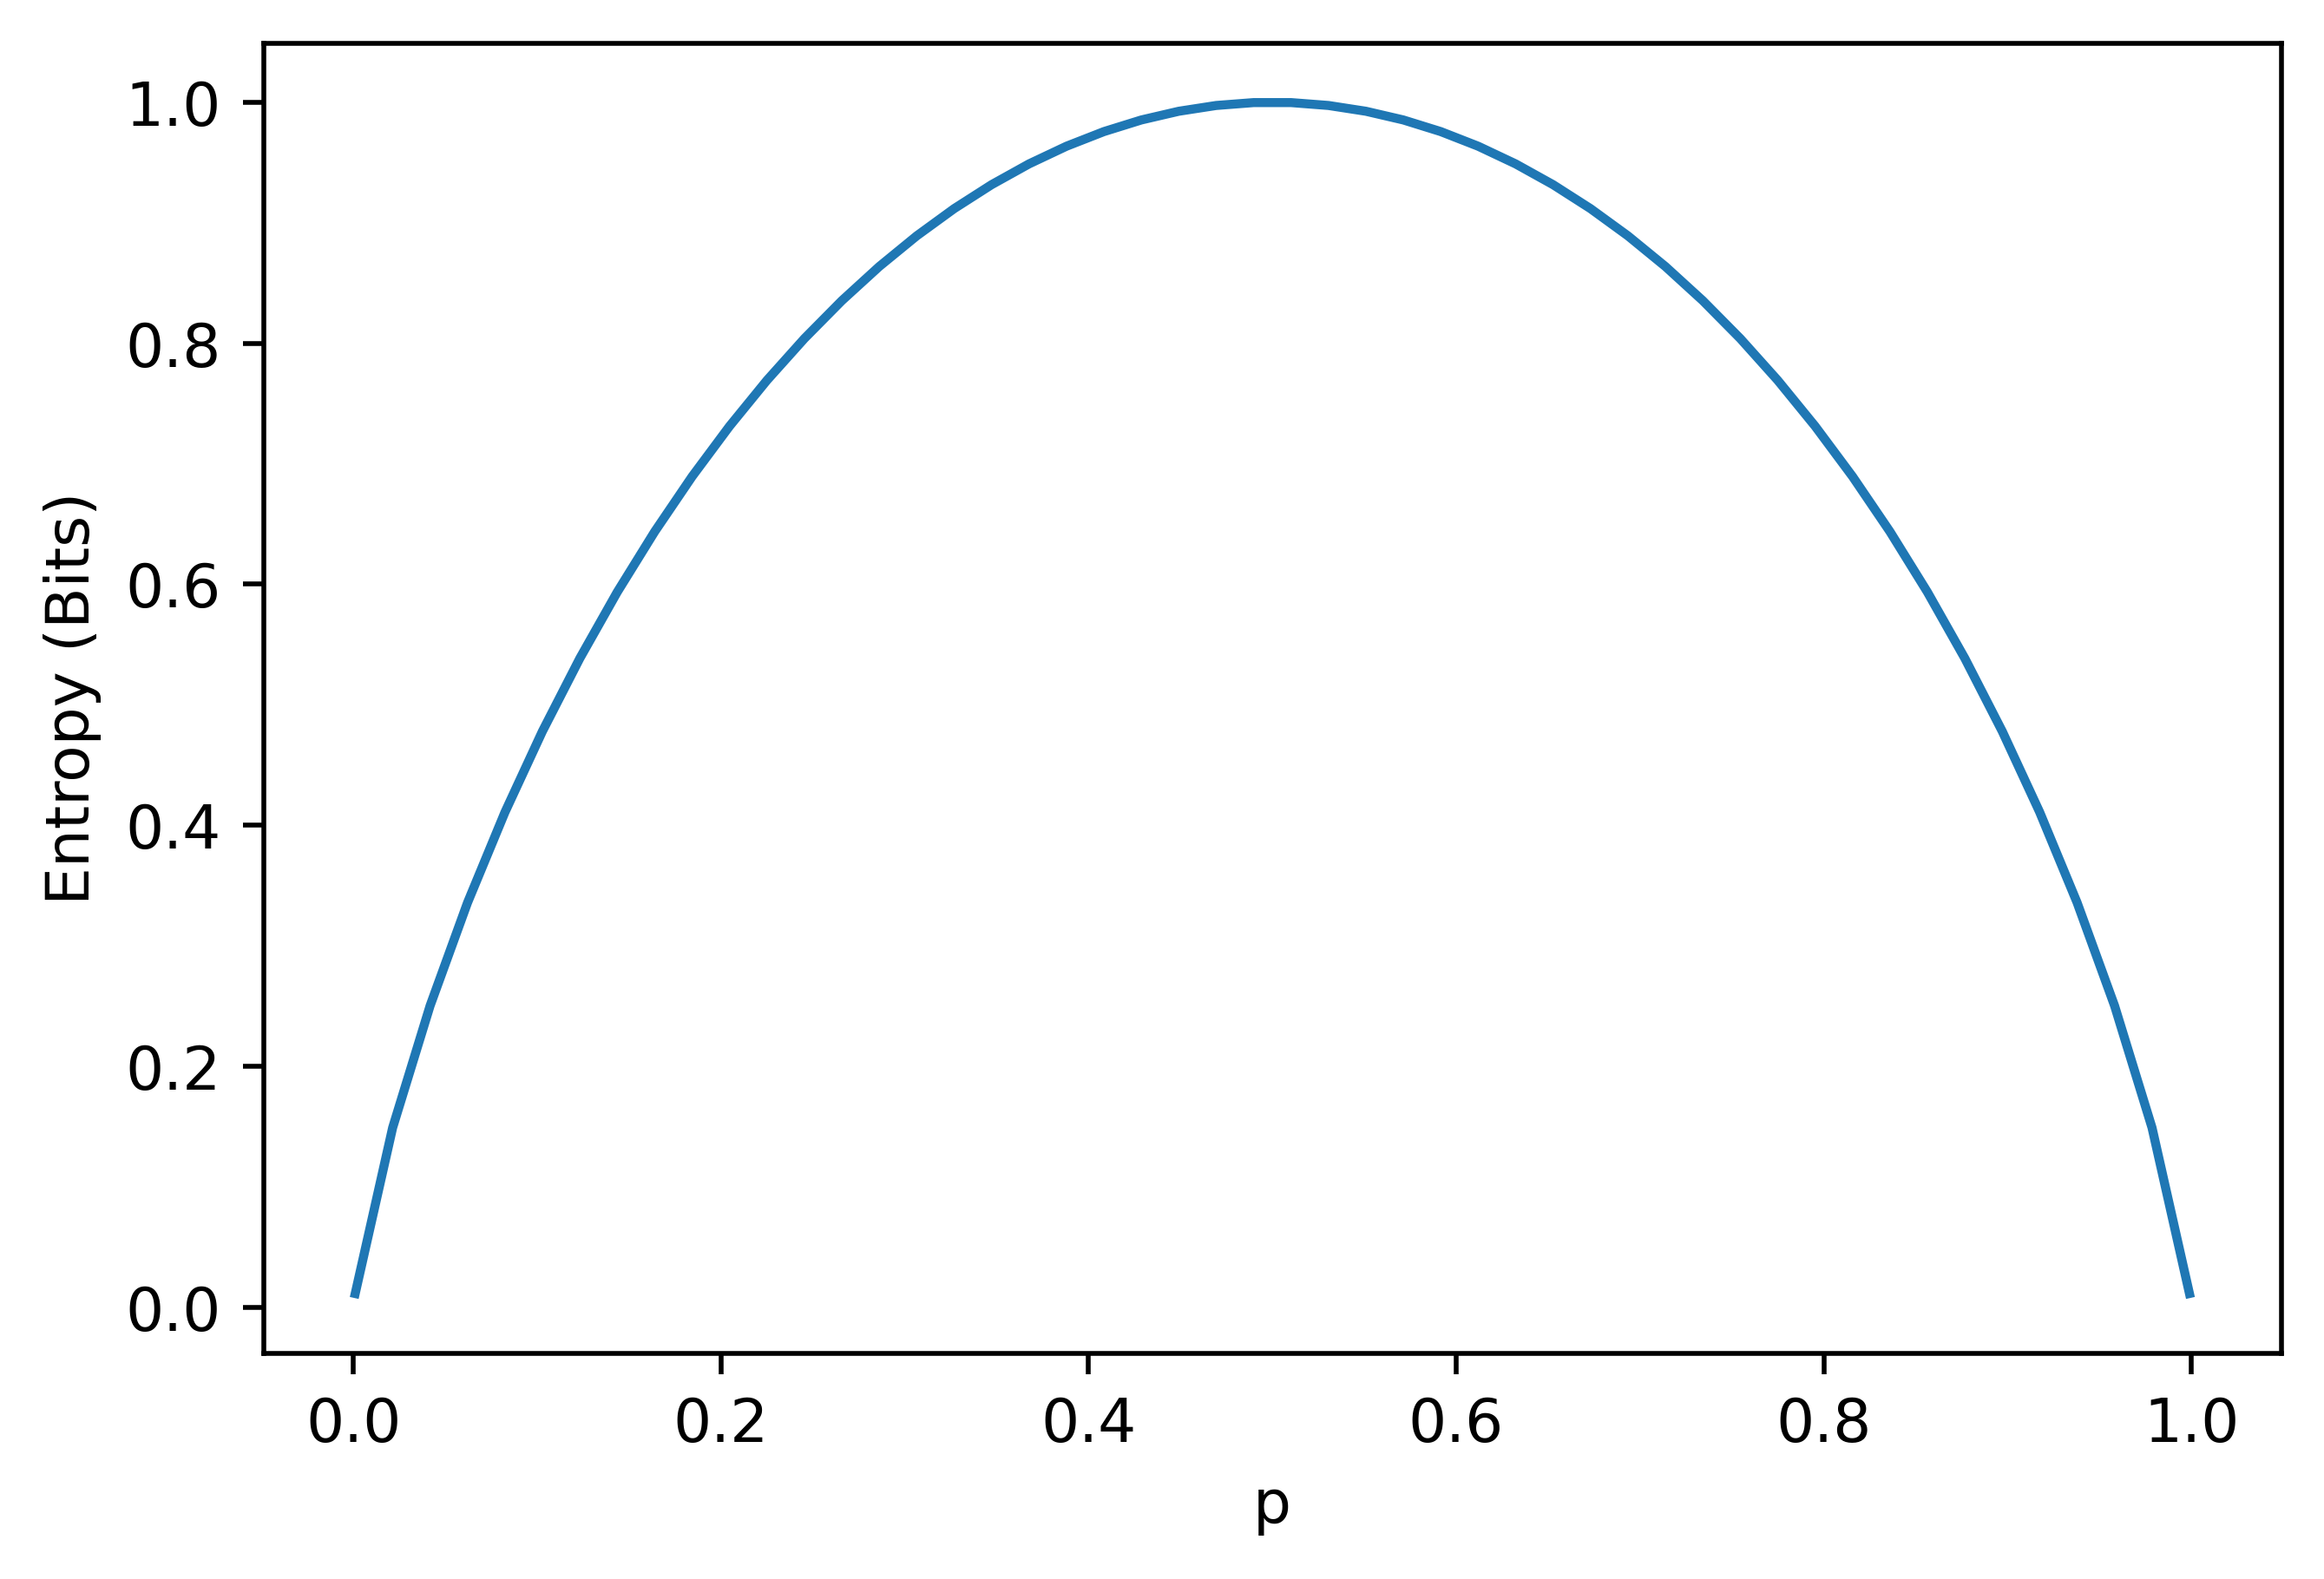

In [45]:
p = np.linspace(0.001, 0.999) 

y = -p*np.log(p)/np.log(2) - (1-p)*np.log(1-p)/np.log(2)

plt.figure(dpi=500)
plt.plot(p, y)
plt.xlabel('p')
plt.ylabel('Entropy (Bits)')
plt.savefig('pdf/tree_entropy.pdf')


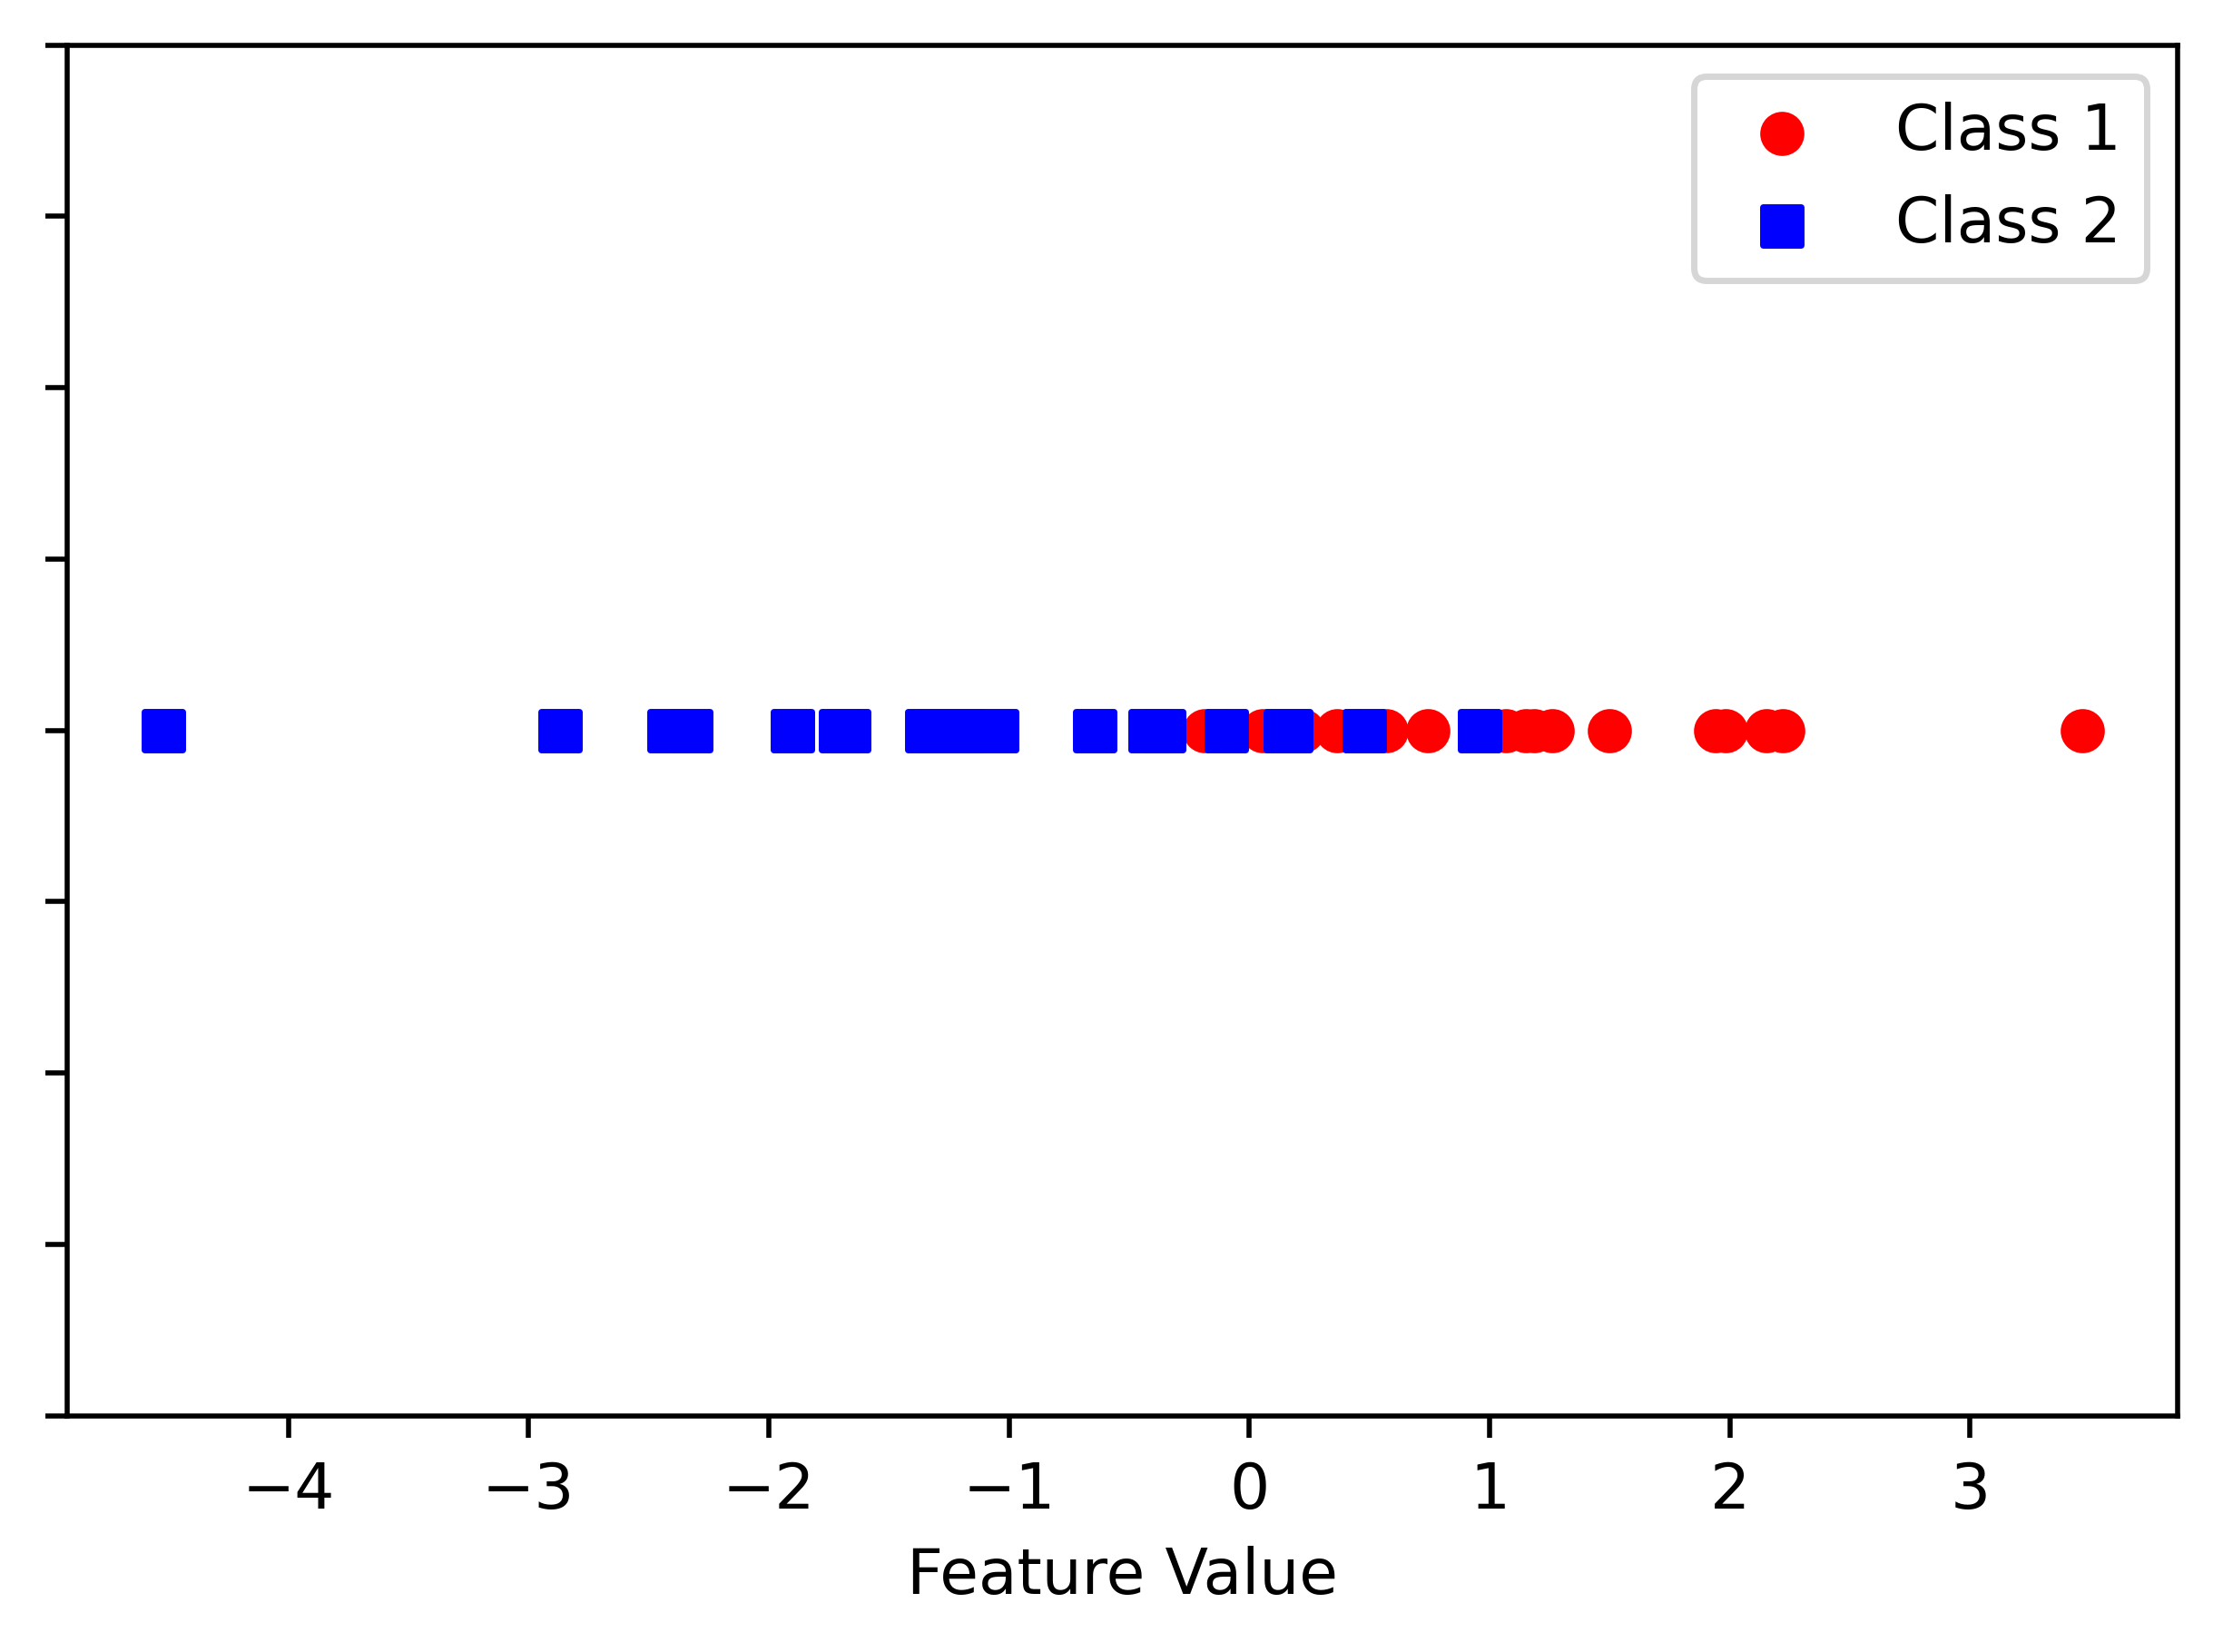

In [59]:
N = 20
y = np.zeros(N)
x1, x2 = np.random.randn(N)+1, np.random.randn(N)-1

ax = plt.figure(dpi=500)
plt.scatter(x1, y, marker='o', c='r', label='Class 1')
plt.scatter(x2, y, marker='s', c='b', label='Class 2')
plt.legend()
plt.xlabel('Feature Value')
plt.ylim([0.02, -0.02])


ax = plt.gca()
ax.axes.yaxis.set_ticklabels([]);
plt.savefig('pdf/tree_1d.pdf')


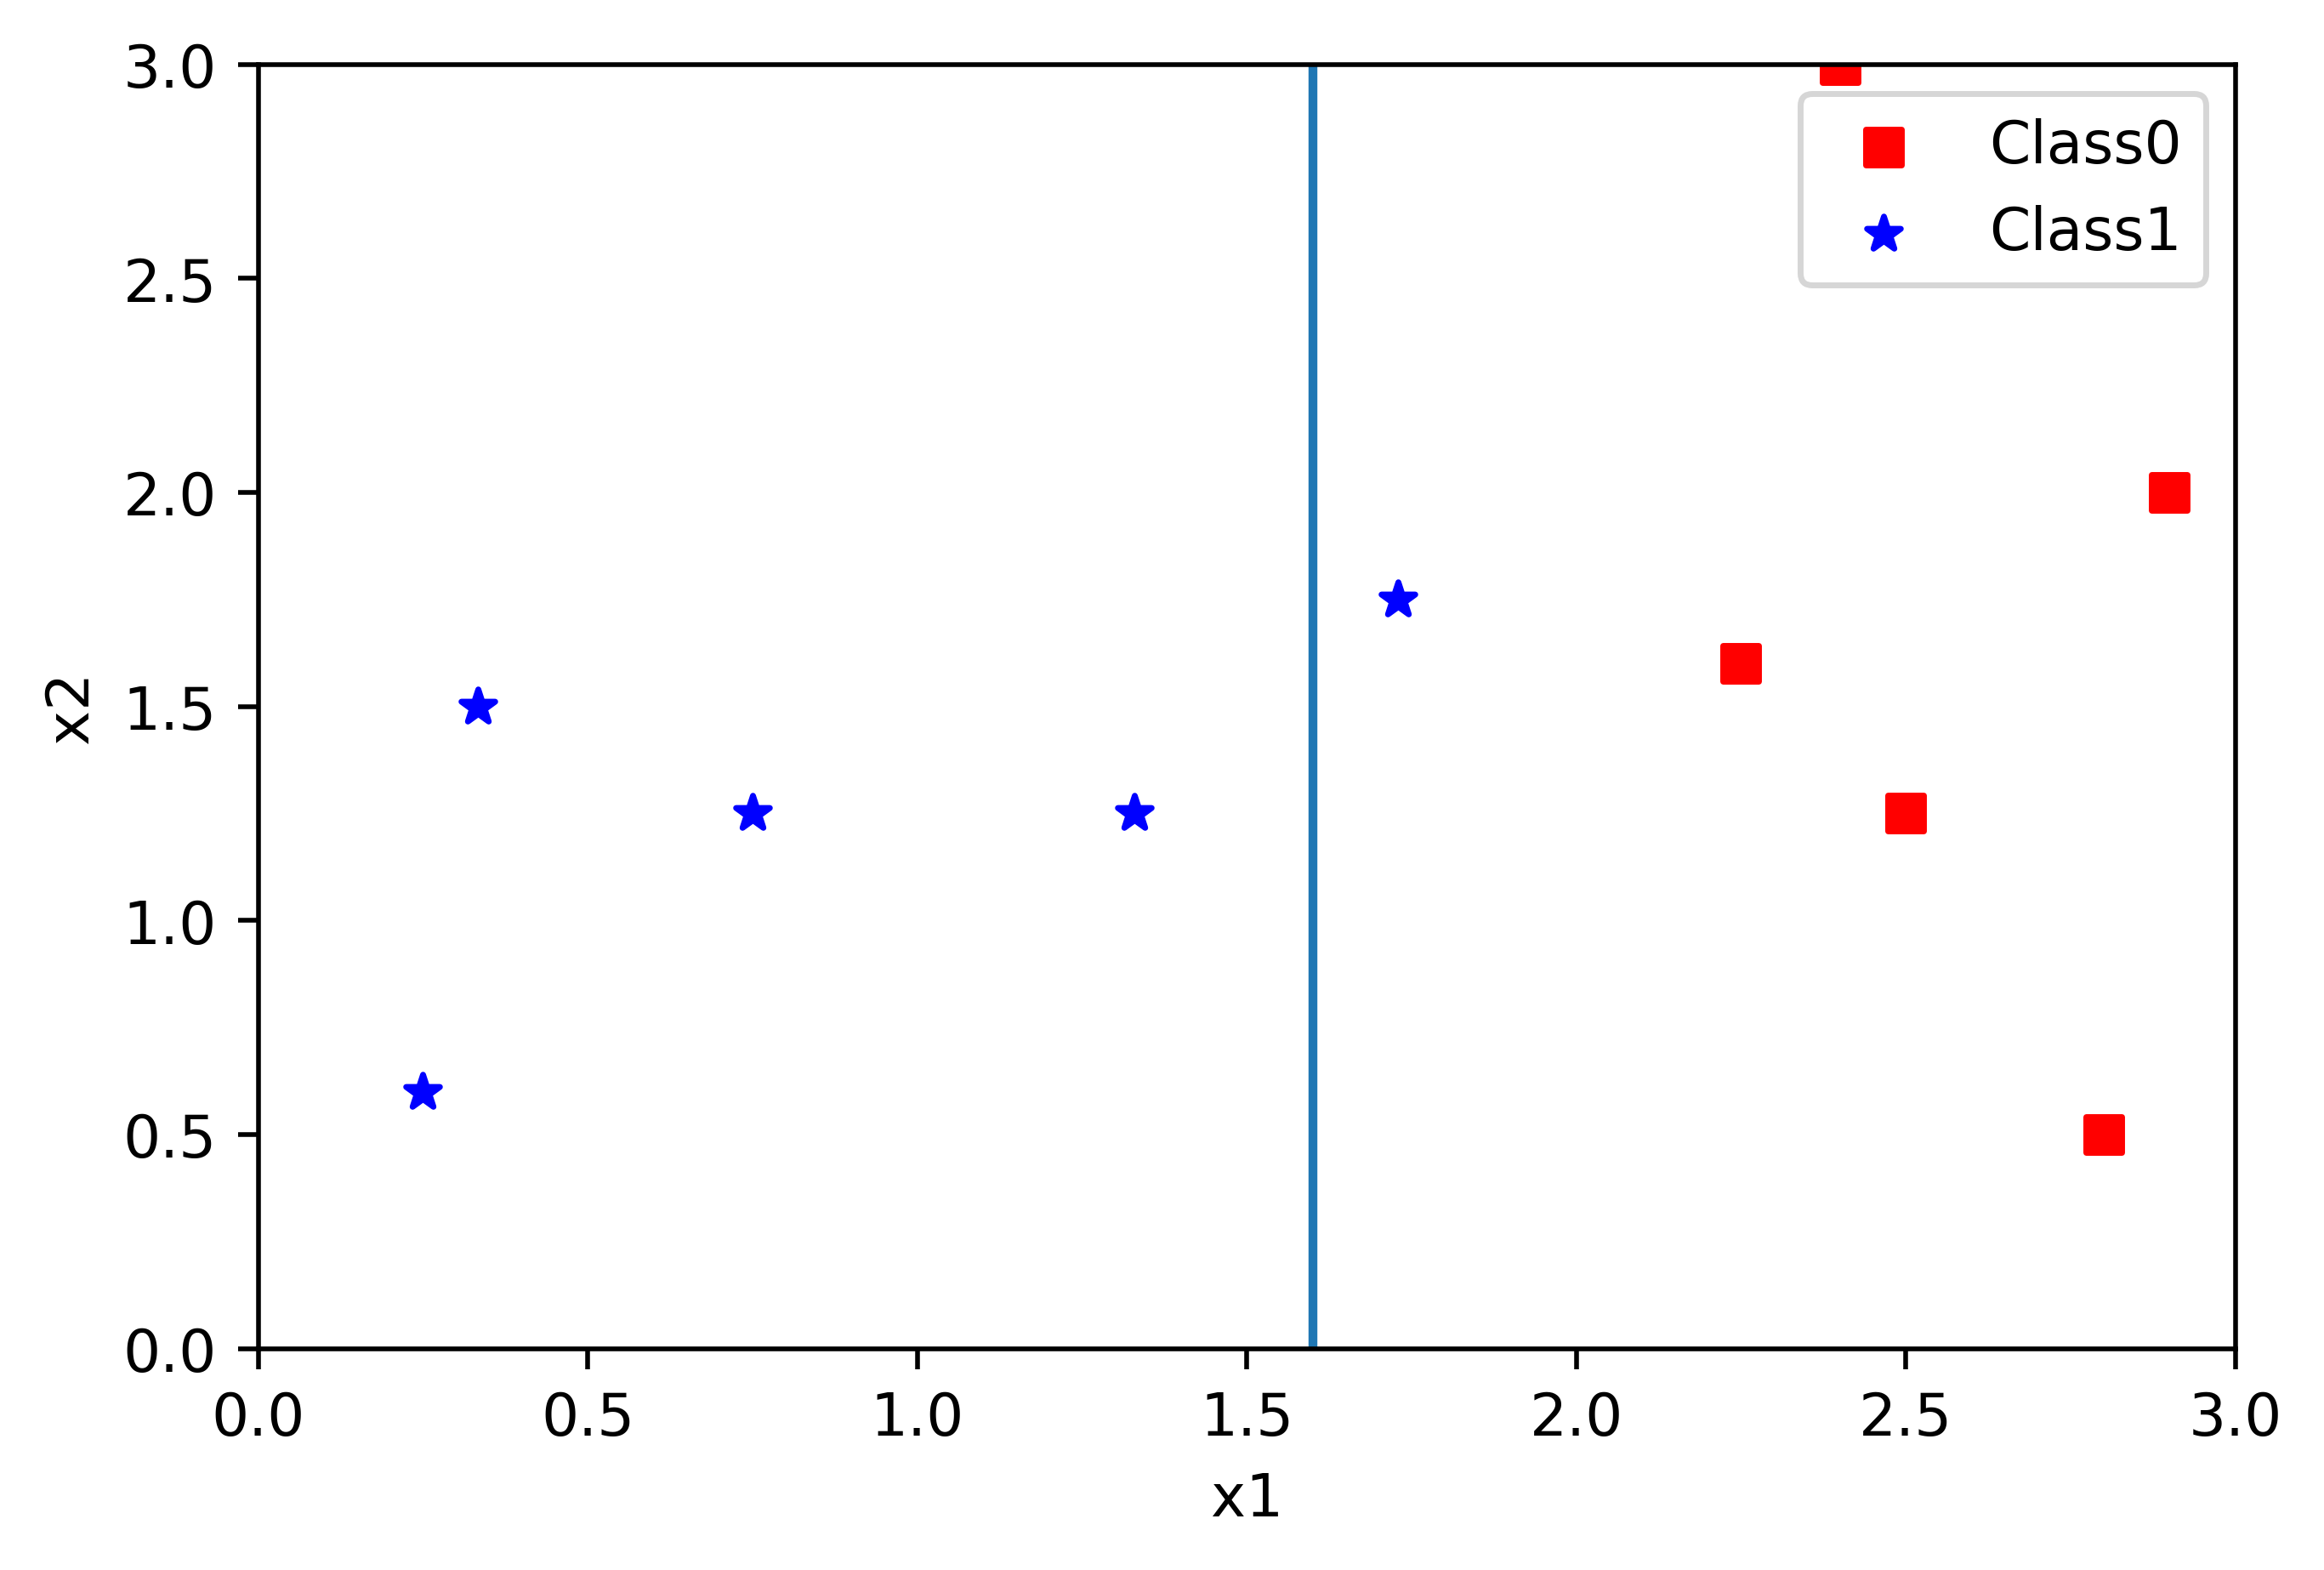

In [17]:
X = [[.333,1.5],
     [.25,.6],
     [.75,1.25],
     [1.33,1.25],
     [1.73,1.75],
     [2.25, 1.6],
     [2.5, 1.25],
     [2.4, 3],
     [2.8,.5],
     [2.9,2]]
X = np.array(X) 
y = np.array([0,0,0,0,0,1,1,1,1,1])

plt.figure(dpi=500)
plt.scatter(X[y==1,0], X[y==1,1], marker='s', c='r', label='Class0')
plt.scatter(X[y==0,0], X[y==0,1], marker='*', c='b', label='Class1')
plt.plot([1.6, 1.6], [0,4])
plt.xlim([0,3])
plt.ylim([0,3])
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.savefig('pdf/tree_gini.pdf')